## Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.


## Attribute Information
1- Id number: 1 to 214

2- RI: refractive index

3- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4- Mg: Magnesium

5- Al: Aluminum

6- Si: Silicon

7- K: Potassium

8- Ca: Calcium

9- Ba: Barium

10- Fe: Iron

11- Type of glass

## Type of glass: (class attribute)
• 1- building_windows_float_processed

• 2- building_windows_non_float_processed

• 3- vehicle_windows_float_processed

• 4- vehicle_windows_non_float_processed (none in this database)

• 5- containers

• 6- tableware

• 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

## Predict- Type of Glass

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
cname=['Id number','Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type of glass']
df.columns=cname

In [9]:
df

,Id number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         214 non-null    int64  
 1   Refractive Index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type of glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


1. All are numerical column with datatypes as float64 and int64.
2. There are 214 rows and 11 columns.
3. 10 columns are features and 1 column called 'Type of glass' is the target.

In [11]:
df.describe(include = 'all')

,Id number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Silicon has a mean of 72.65 while Iron has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly.

In [12]:
df['Type of glass'].value_counts()

Type of glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

## Checking null values

In [13]:
df.isnull().sum()

Id number           0
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

No null values present in the dataset

In [14]:
#checking if duplicate values are present
df.duplicated().sum()

0

## Data Visualization

<Axes: xlabel='Type of glass', ylabel='count'>

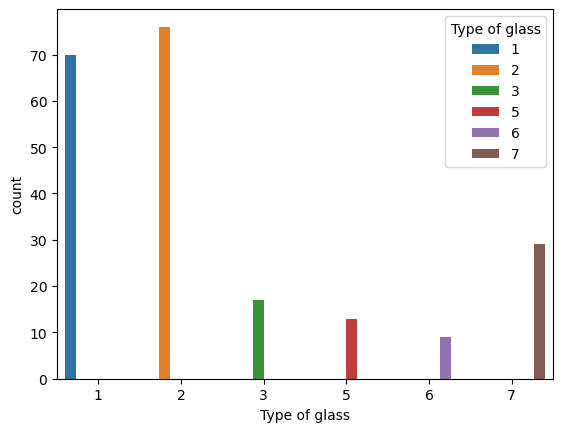

In [15]:
# Count Plot
sns.countplot(data = df, x = 'Type of glass', hue = 'Type of glass')

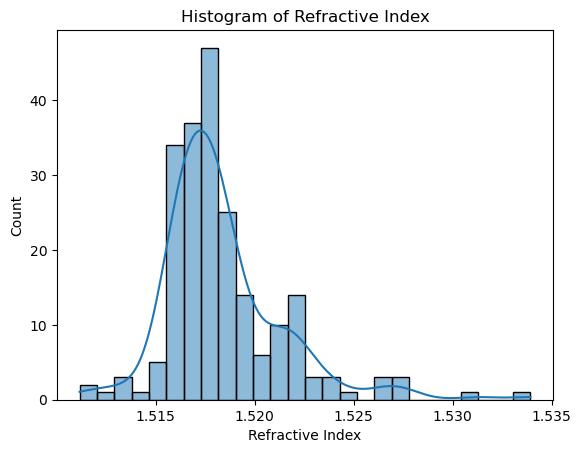

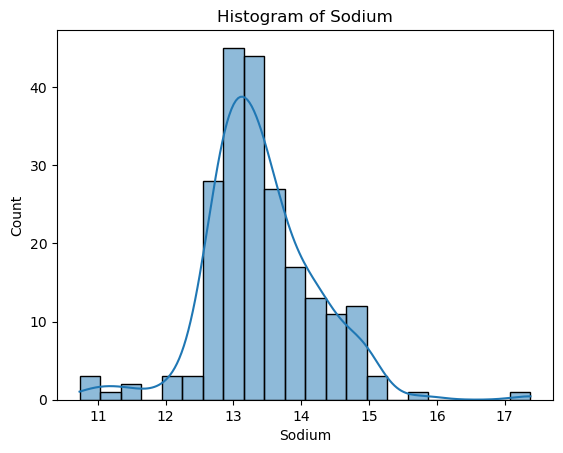

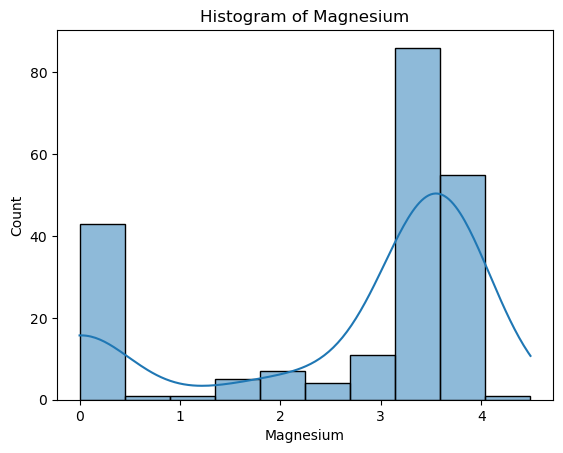

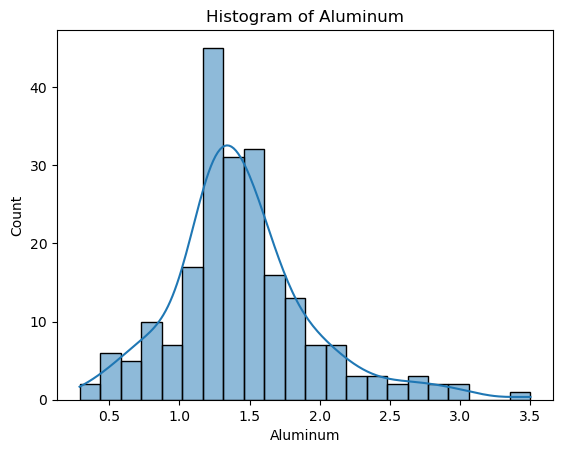

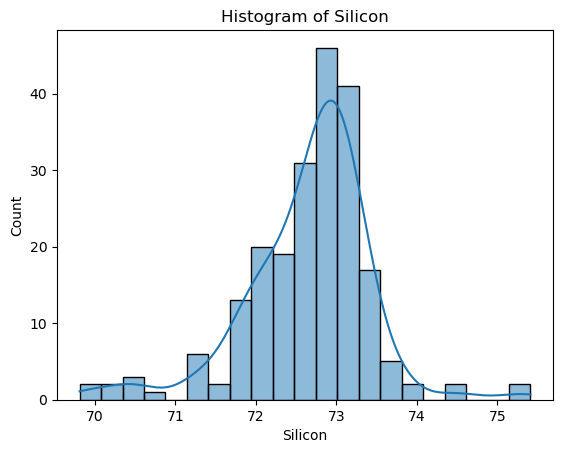

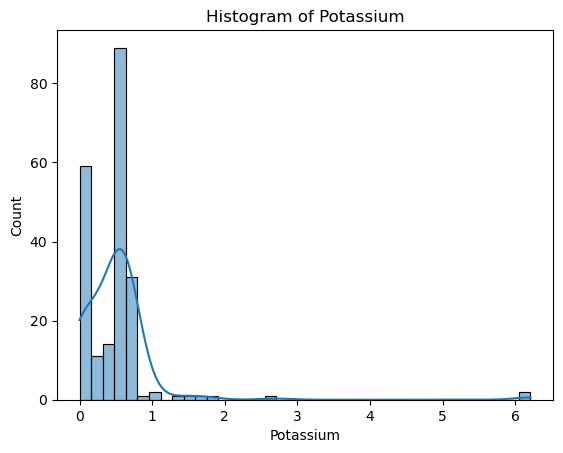

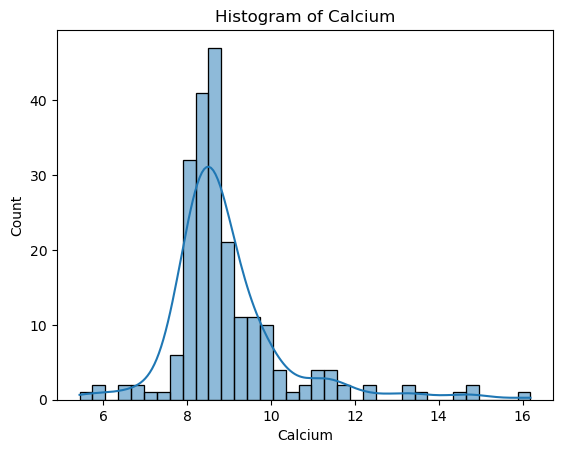

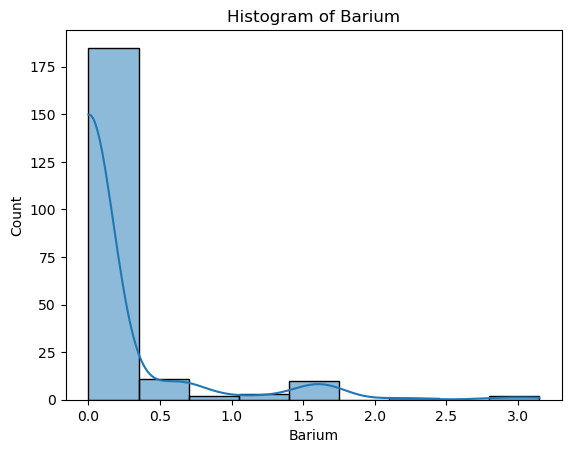

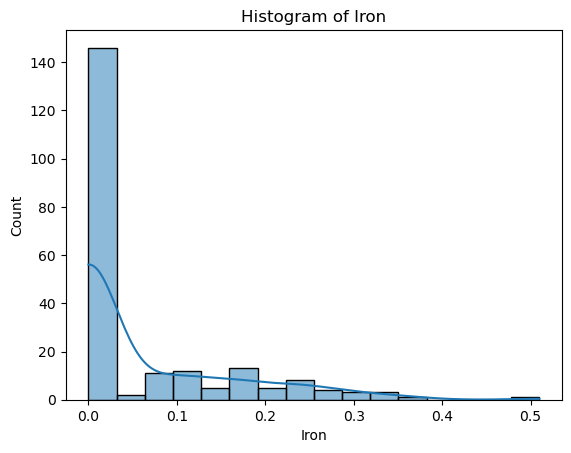

In [16]:
cols = ['Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron']
for i in cols:
    sns.histplot(data = df, x = i, kde = True)
    plt.title(f"Histogram of {i}")
    plt.show()

1. Here we can see the distribution of the data columns.
2. Also we can notice that the flat lines in the graph depicts the presence of outliers

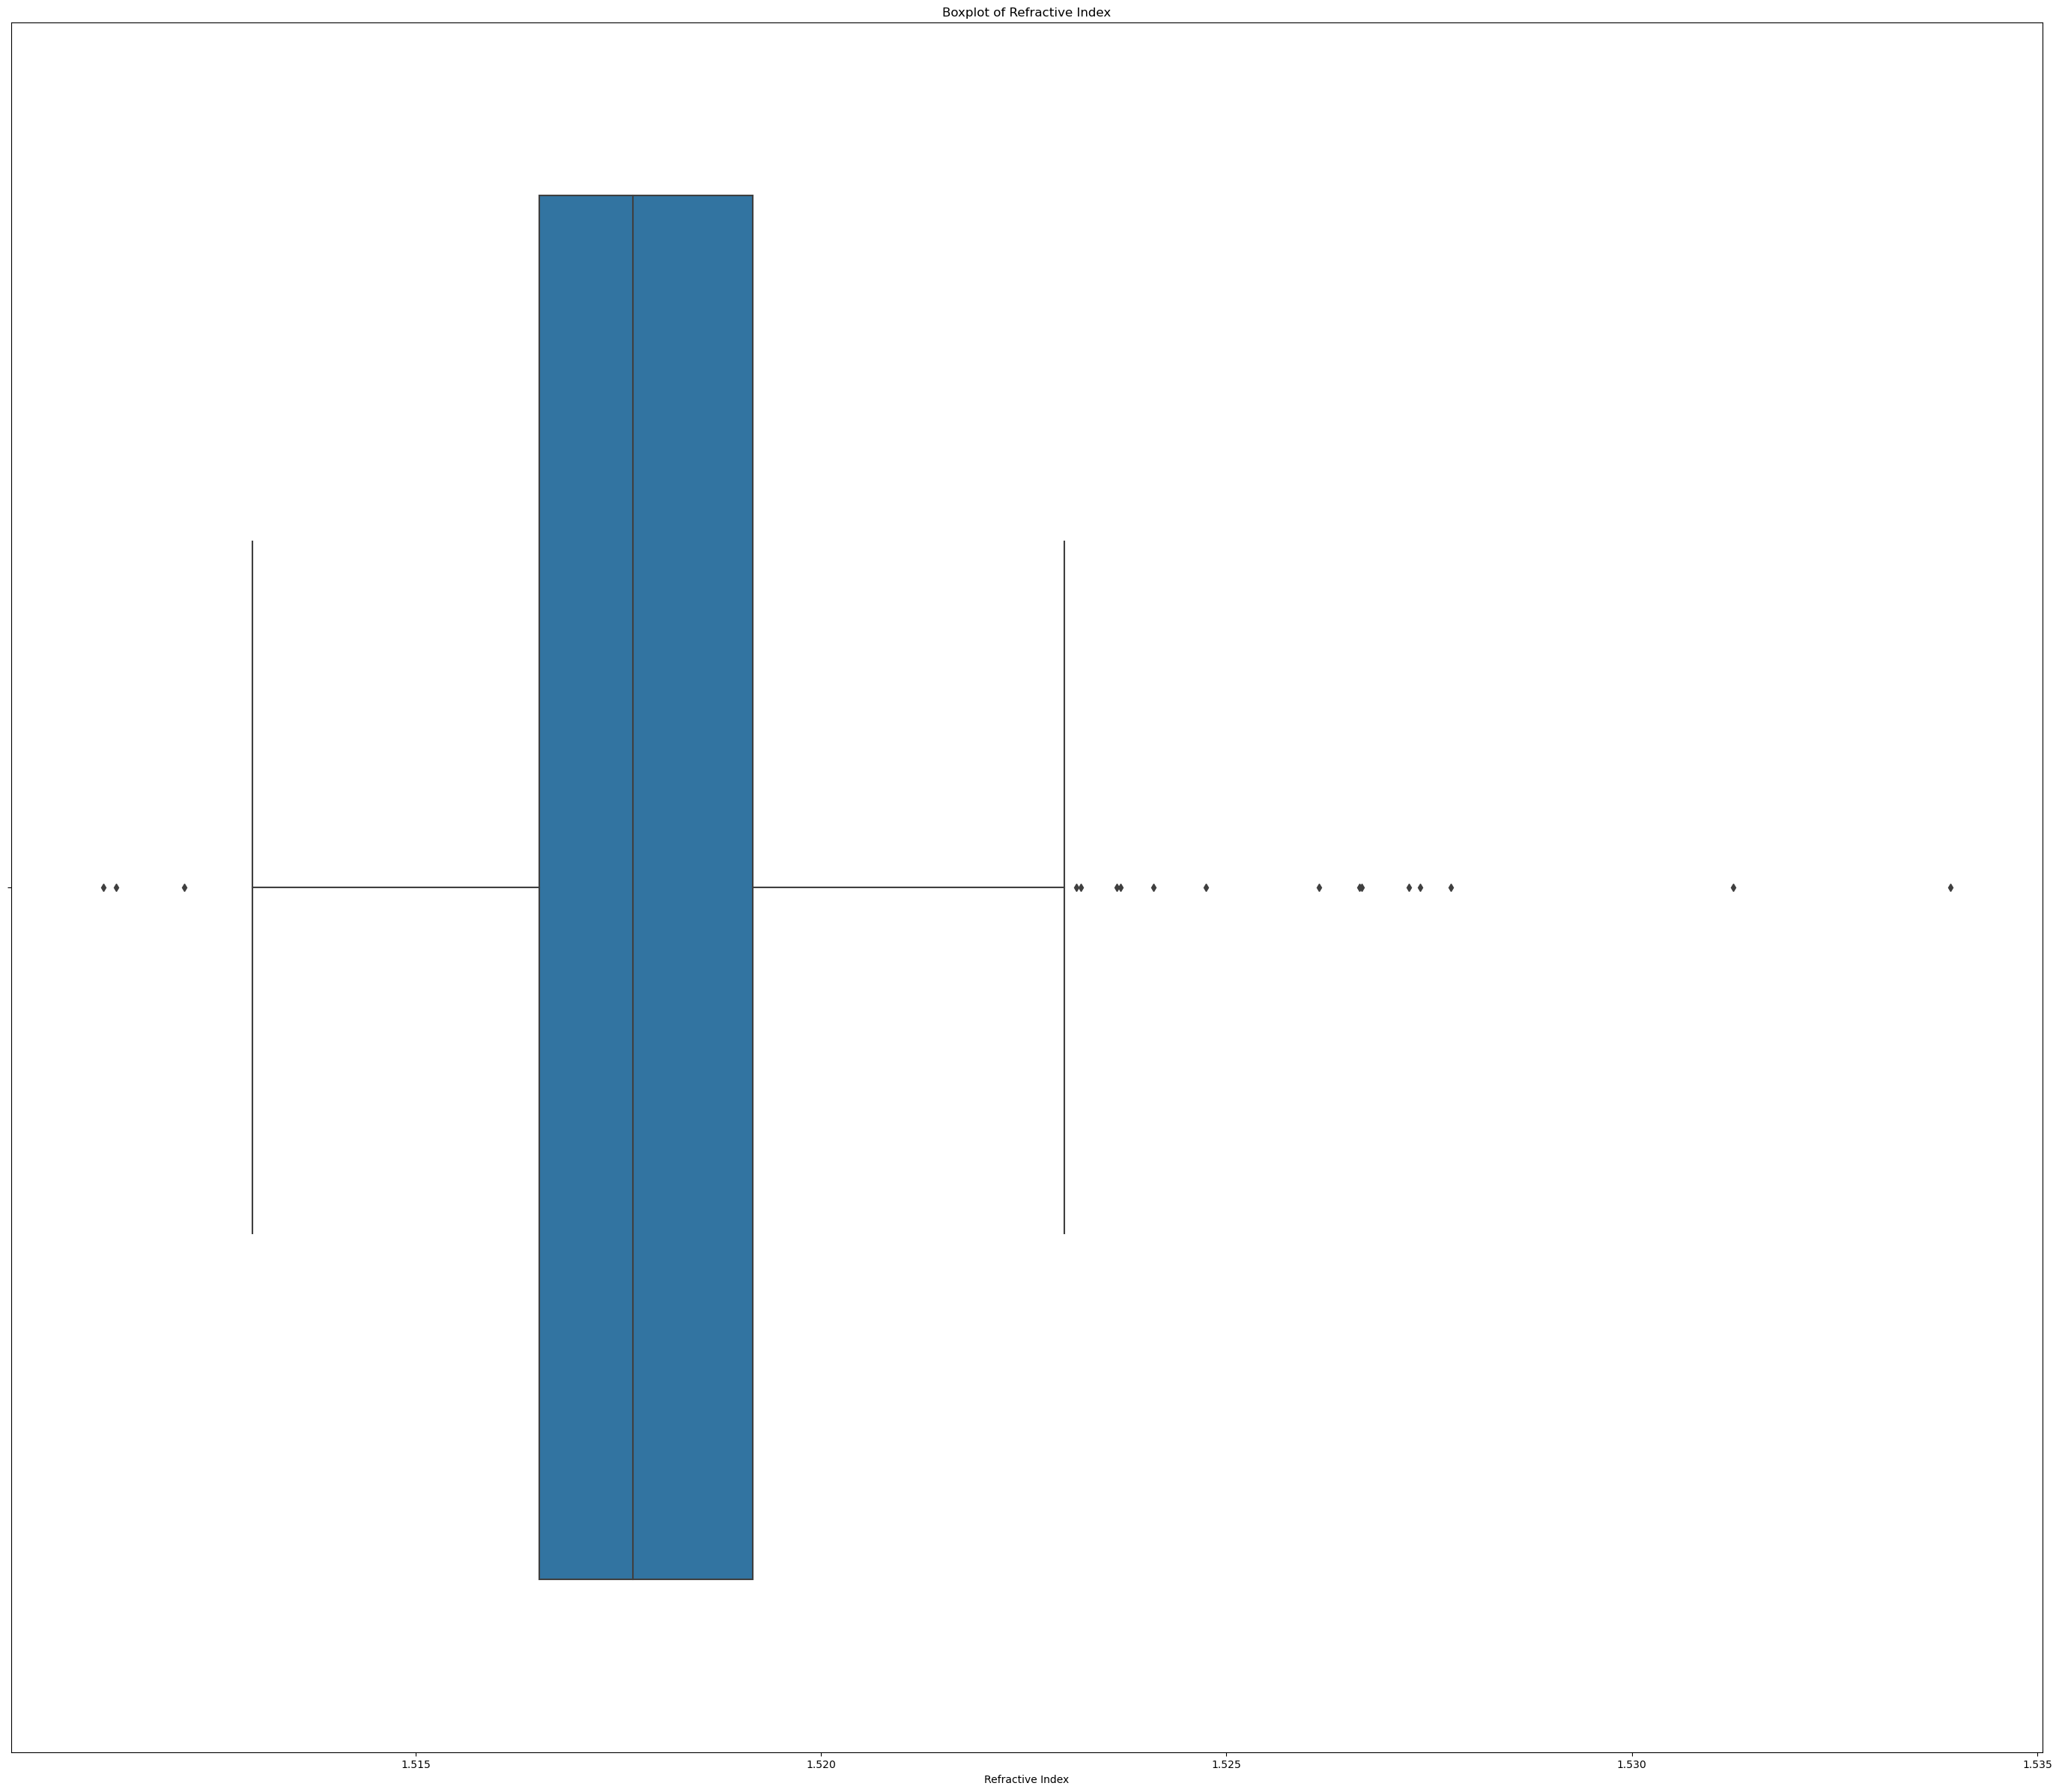

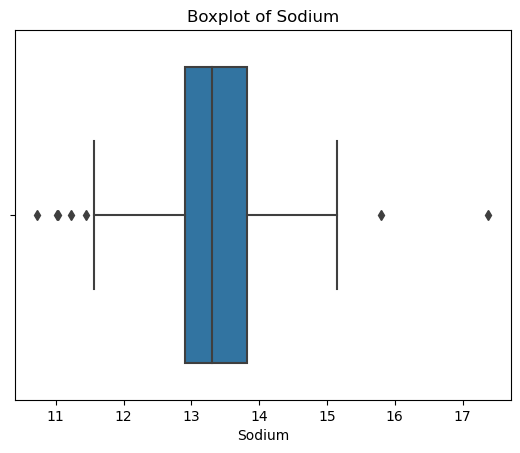

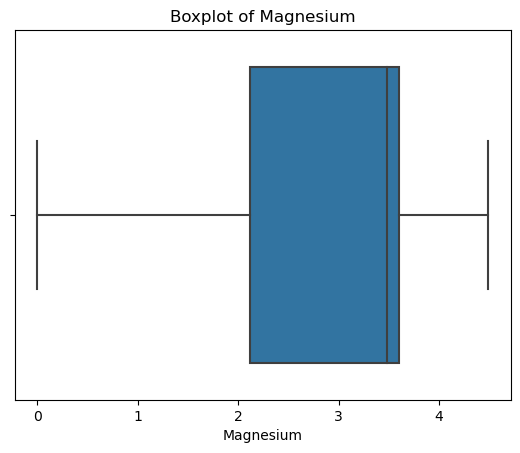

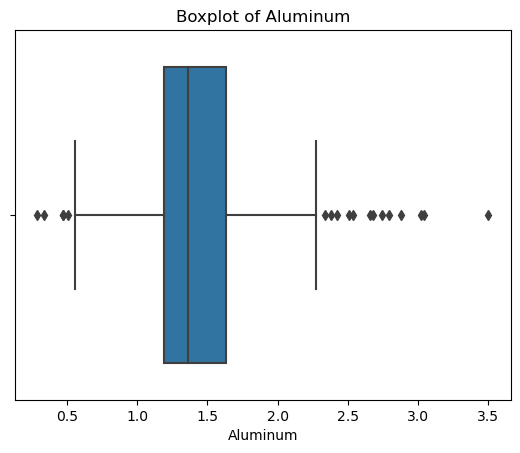

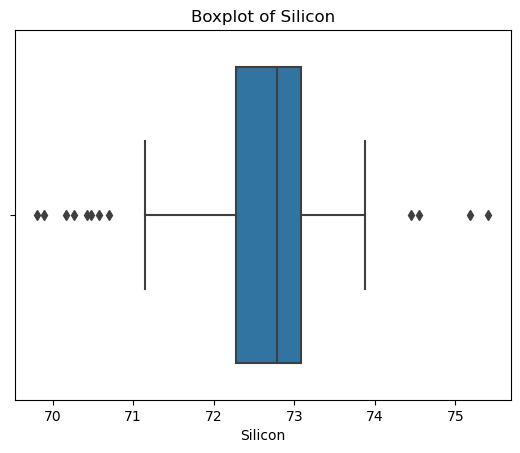

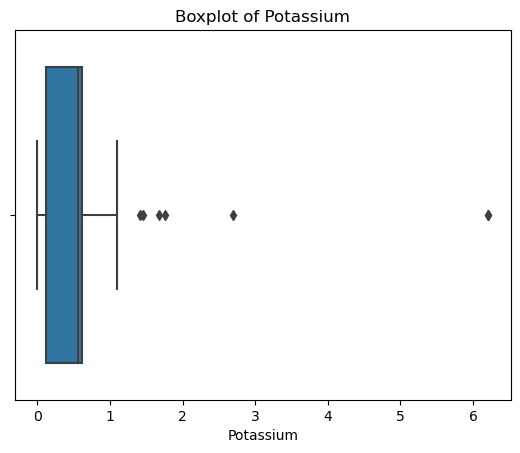

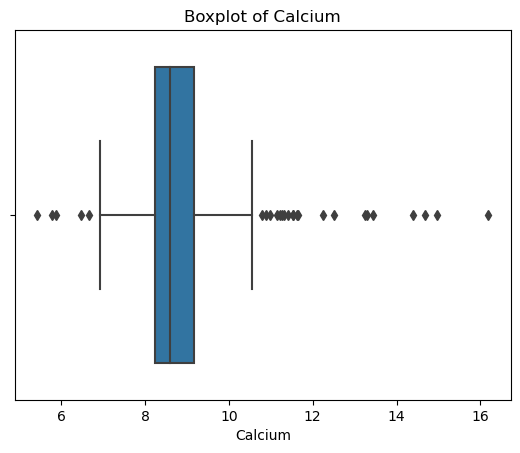

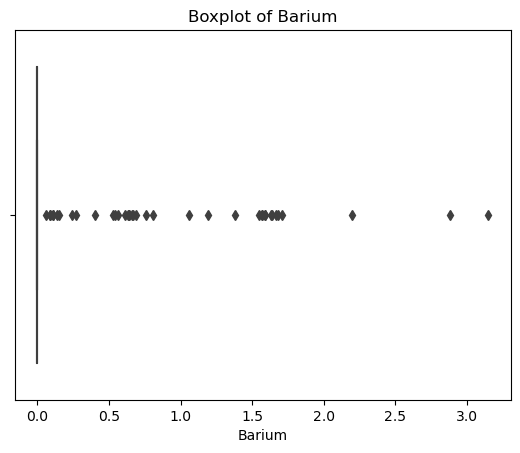

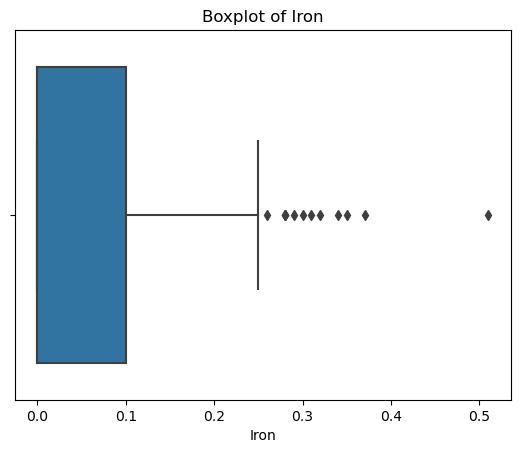

In [17]:
# Outlier Analysis
f, ax = plt.subplots(figsize = (35,30))
for i in cols:
    sns.boxplot(data = df, x = i)
    plt.title(f"Boxplot of {i}")
    plt.show()

The presence of the dots in by the two sides of the box plot denotes the presence of outliers.

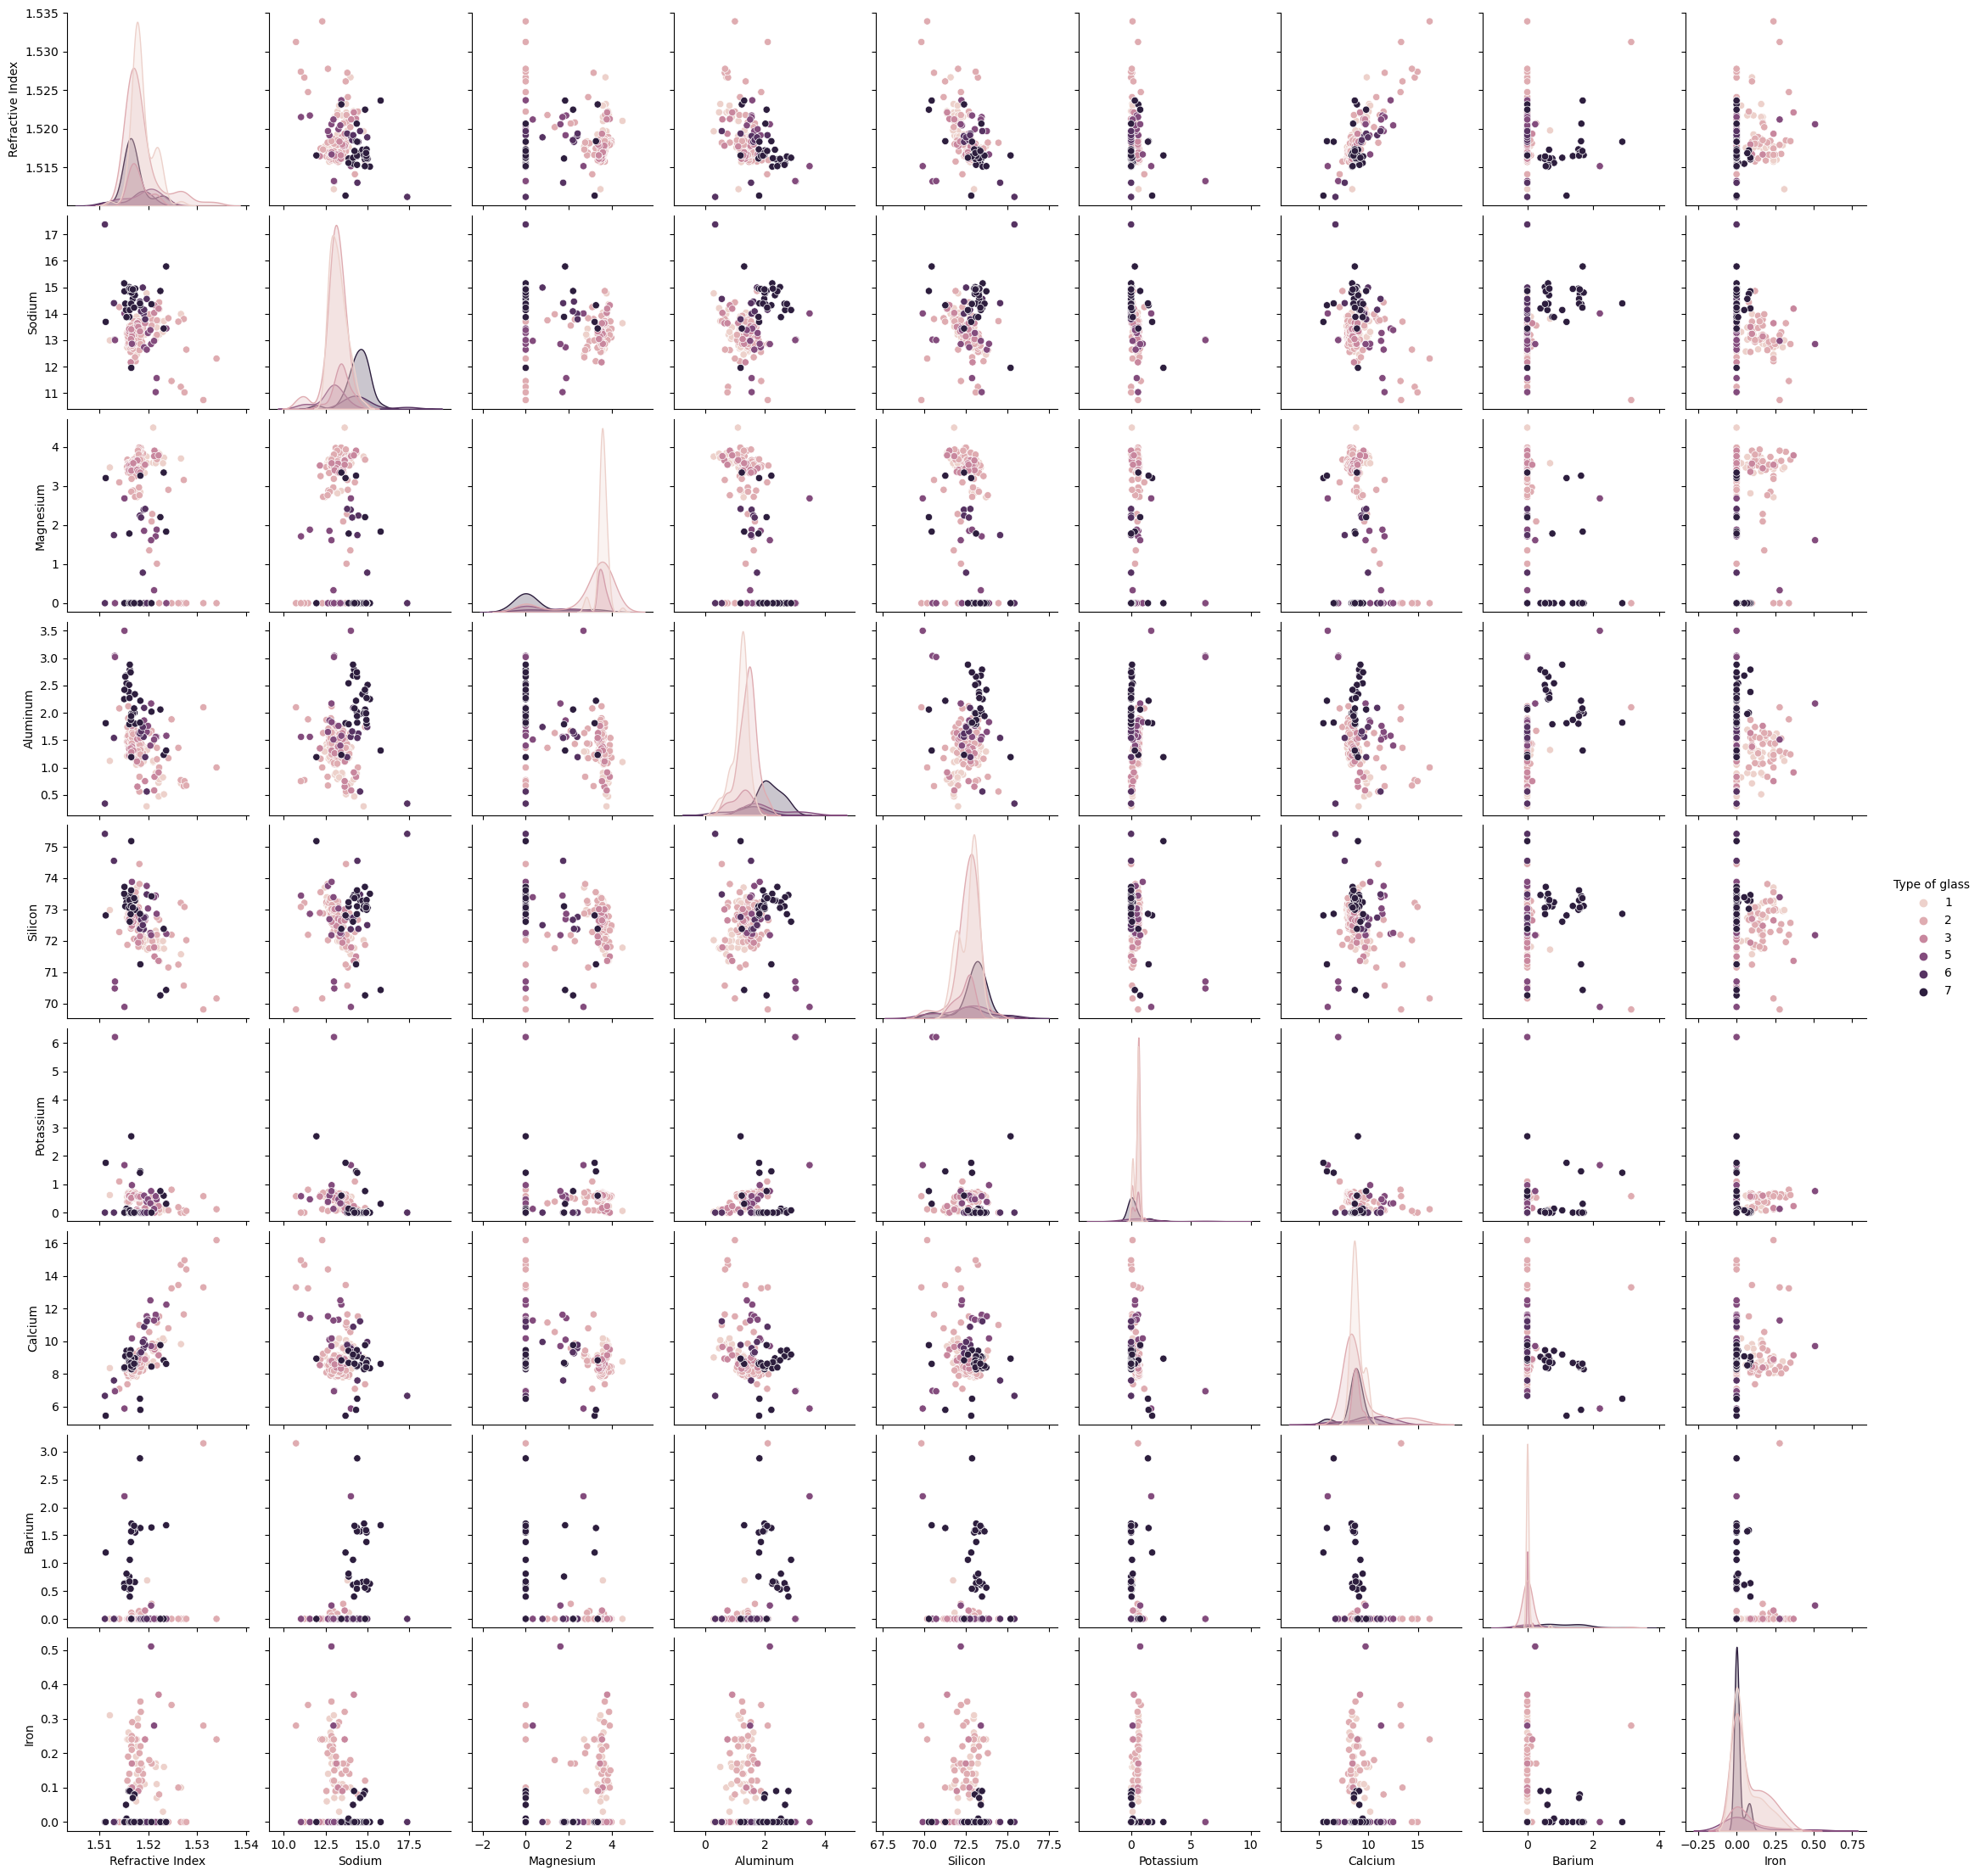

In [19]:
cols = ['Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type of glass']
sns.pairplot(df[cols],hue = 'Type of glass')

In the pairplot we can see that there is a relation existing between Refractive index and Calcium.

## Data Correlation

In [25]:
df.corr()

,Id number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
Id number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
Refractive Index,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Sodium,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Magnesium,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Aluminum,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Silicon,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
Potassium,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Calcium,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Barium,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Iron,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


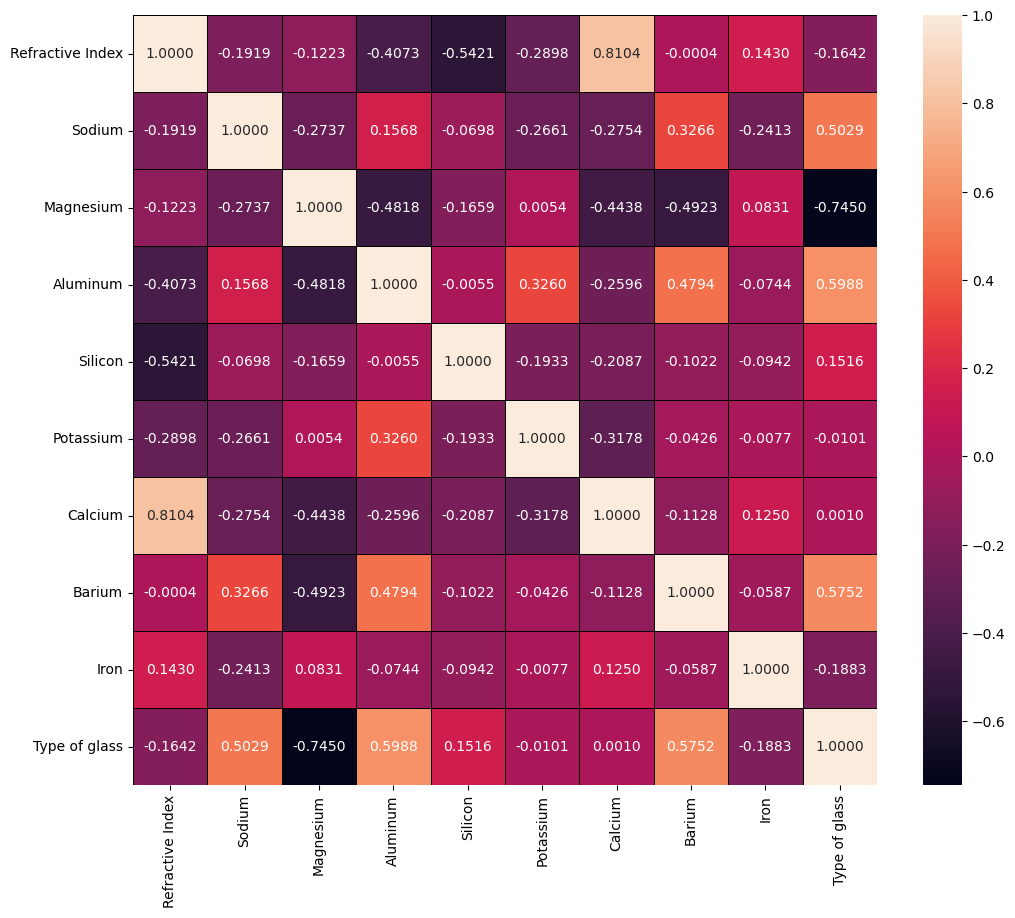

In [24]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

1. There is high correlation between Calcium and Refractive Index hence, we can drop one of them.
2. When we look into the Type of glass, Calcium and sodium doesn't contribute to the Type much since it's correlation is less or almost equal to zero.
3. Hence, in our model,we will be only considering feature columns except Calcium and Sodium.

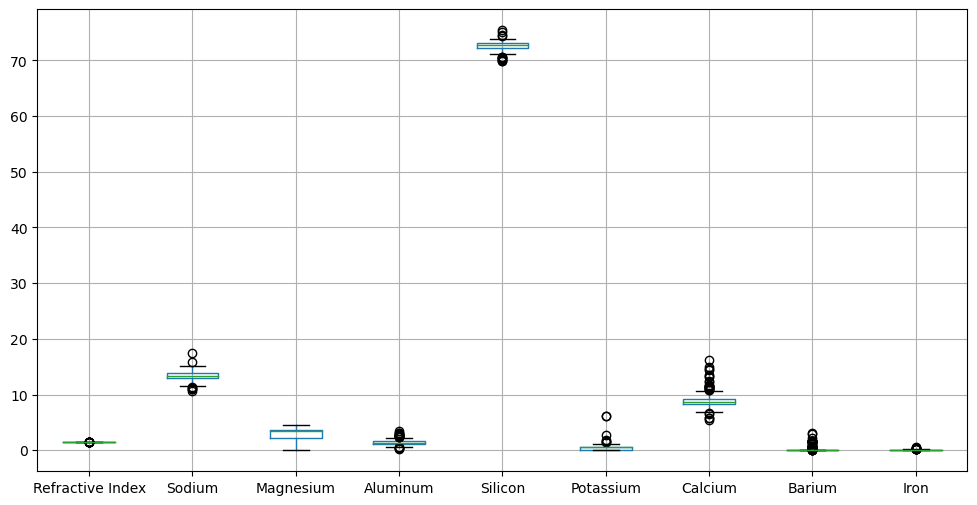

In [23]:
#plotting boxplot without id number
df.iloc[:,1:-1].boxplot(figsize=(12,6))
plt.show()

## Data Preprocessing

In [26]:
X = df[['Refractive Index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron']]
y = df['Type of glass']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

## Model Choice


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [65]:
## Normalizing / Scaling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

In [66]:
X.head(2)

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


## Train Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

In [69]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of y_train = (160,)
Shape of y_test = (54,)


## Applying Different Machine learning Models

1.KNN

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.68125
[0.6296296296296297, 0.6296296296296297, 0.6851851851851852, 0.7037037037037037, 0.6666666666666666, 0.6481481481481481, 0.7037037037037037, 0.7037037037037037, 0.7407407407407407]


2.Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.7037037037037037]


3.Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.625
[0.6851851851851852]


4.Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

Scores = []
Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    #forest = RandomForestClassifier(n_estimators=i ,random_state=0)
    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    #Scores.append(score)

print(forest.score(X_train,y_train))
print(score)

0.975
0.7407407407407407


Out of all the models tested above:Random forest gives the best result with:

training accuracy: 0.975

test accuracy: 0.975

But since it is overfitting,it suggests that the model might not perform well on unknown data.

Hence, we shall choose the next best model that is:
KNN

training accuracy: 0.68125

testing accuracy: 0.7407407407407407

In [75]:
knnModel = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
knnModel

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [76]:
# Fitting the data
knnModel.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [77]:
# Prediting the classes
pred = knnModel.predict(X_test)
pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 4, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 3, 3, 1, 1, 3, 1, 0, 5, 0, 5, 0, 5, 5, 1, 0, 0, 4, 0, 1, 5,
       0, 0, 0, 0, 0, 1, 0, 1, 5, 1], dtype=int64)

## Evaluation of the model

In [78]:
cm = confusion_matrix(y_test, pred)
cm

array([[16,  1,  1,  0,  0,  0],
       [ 3, 14,  0,  1,  1,  0],
       [ 4,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0,  6]], dtype=int64)

In [79]:
ConfusionMatrix = pd.DataFrame(data = cm, index = ['Class 1', 'Class 2', 'Class 3', 'Class 5', 'Class 6', 'Class 7'], columns = ['Class 1', 'Class 2', 'Class 3','Class 5', 'Class 6', 'Class 7'])
ConfusionMatrix

,Class 1,Class 2,Class 3,Class 5,Class 6,Class 7
Class 1,16,1,1,0,0,0
Class 2,3,14,0,1,1,0
Class 3,4,0,0,0,0,0
Class 5,0,1,0,2,0,0
Class 6,0,1,0,0,1,0
Class 7,0,2,0,0,0,6


In [80]:
acc = accuracy_score(y_test, pred)
acc

0.7222222222222222

We got the classification Accuracy to be about 72.2%

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.74      0.74      0.74        19
           2       0.00      0.00      0.00         4
           3       0.67      0.67      0.67         3
           4       0.50      0.50      0.50         2
           5       1.00      0.75      0.86         8

    accuracy                           0.72        54
   macro avg       0.60      0.59      0.59        54
weighted avg       0.69      0.72      0.70        54



## Selection of the HyperParamer K

we knew the number of classes were 7. Hence we gave the value of K as 7. Else, we would be checking the accuracy for each value of K and then finding the best k suitable for our model.

In [82]:
k_values = list(range(1, 21))
accuracy_scores = []

# Evaluate accuracy for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit classifier on training data
    knn.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy score and store
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best k value with highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f'Best k value: {best_k}')
print(f'Highest accuracy: {best_accuracy:.4f}')

Best k value: 12
Highest accuracy: 0.7593


We have implemented KNN in Glass Dataset and we have classified the data into 7 classes succesfully with an accuracy of 75.9%.